# Stern-Volmer analysis of fluorescence quenching of photocatalysts within hollow-core photonic crystal fibre microreactors
This Jupyter Notebook is the code utilised to perform Stern-Volmer analysis on 4CzIPN with tetrabutylammonium azide (Bu_4NN_3) and cyclohexylamine (CHA).

In [176]:
import sys
import os
import numpy as np

# import packages
import optofluidics as of
from lmfit import Parameters
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import rc_context
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from scipy.optimize import curve_fit
import scipy.integrate as spi
import pandas as pd

%matplotlib inline

# Set file path to datafile locations, including the .h5 file extension.
file_path1 = r'C:\Users\tl457\Documents\GitHub\Stern-Volmer\2021-07-26.h5'
file_path2 = r'C:\Users\tl457\Documents\GitHub\Stern-Volmer\2021-07-28.h5'

# specify matplotlib configuration file name
plot_config_path = 'C:\\Users\\tl457\\Documents\\GitHub\\Stern-Volmer\\'
plot_config_file = 'plotting_params.txt'
dir = os.path.abspath(os.path.dirname(plot_config_path))
rc_fname=os.path.join(dir, plot_config_file)

OPT=['#347f3a','#36358b','#e47327']

def wav2en(w):
    return np.divide(6.62607004e-34*299792458*1e9*(1/1.60217662e-19),w)

def func(x,m):
    return ((m*x)+1)

# 4CzIPN Bu_4NN_3

In [177]:
# Load the datafile and create a Datafile instance
df1=of.Datafile(file_path1)

# List the datasets contained within the datafile
df1.list_groups()

Datafile intialised successfully 

Key 0: ACN-Clean-1 

Key 1: ACN-Clean-2 

Key 2: ACN-Clean-3 

Key 3: ACN-Ex365-2 

Key 4: ACN-Ex365nm 

Key 5: ACN-NKT 

Key 6: ACN-NKT-2 

Key 7: S1-1 

Key 8: S1-2 

Key 9: S1-3 

Key 10: S1-4 

Key 11: S1-5 

Key 12: S2-1 

Key 13: S2-2 

Key 14: S2-3 

Key 15: S3-1 

Key 16: S3-2 

Key 17: S3-3 

Key 18: S4-1 

Key 19: S4-2 

Key 20: S4-3 

Key 21: S5-1 

Key 22: S5-2 

Key 23: S5-3 



In [178]:
# Create list of all spectra at all quencher concentrations (3 repeats)
ds_list=[]

ds_list.append(of.Dataset(df1,0))
ds_list.append(of.Dataset(df1,1))
ds_list.append(of.Dataset(df1,2))
ds_list.append(of.Dataset(df1,9))
ds_list.append(of.Dataset(df1,10))
ds_list.append(of.Dataset(df1,11))
ds_list.append(of.Dataset(df1,12))
ds_list.append(of.Dataset(df1,13))
ds_list.append(of.Dataset(df1,14))
ds_list.append(of.Dataset(df1,15))
ds_list.append(of.Dataset(df1,16))
ds_list.append(of.Dataset(df1,17))
ds_list.append(of.Dataset(df1,18))
ds_list.append(of.Dataset(df1,19))
ds_list.append(of.Dataset(df1,20))
ds_list.append(of.Dataset(df1,21))
ds_list.append(of.Dataset(df1,22))
ds_list.append(of.Dataset(df1,23))

# Pre-process the data (background correction)
for item in ds_list:
    item.pre_process()

/ACN-Clean-1/timelapse_0 dataset loaded successfully 

/ACN-Clean-2/timelapse_0 dataset loaded successfully 

/ACN-Clean-3/timelapse_0 dataset loaded successfully 

/S1-3/timelapse_0 dataset loaded successfully 

/S1-4/timelapse_0 dataset loaded successfully 

/S1-5/timelapse_0 dataset loaded successfully 

/S2-1/timelapse_0 dataset loaded successfully 

/S2-2/timelapse_0 dataset loaded successfully 

/S2-3/timelapse_0 dataset loaded successfully 

/S3-1/timelapse_0 dataset loaded successfully 

/S3-2/timelapse_0 dataset loaded successfully 

/S3-3/timelapse_0 dataset loaded successfully 

/S4-1/timelapse_0 dataset loaded successfully 

/S4-2/timelapse_0 dataset loaded successfully 

/S4-3/timelapse_0 dataset loaded successfully 

/S5-1/timelapse_0 dataset loaded successfully 

/S5-2/timelapse_0 dataset loaded successfully 

/S5-3/timelapse_0 dataset loaded successfully 

Measurement was started at 2021-07-26 16:04:00.644234, 
 normalising times and applying a background correction 

M

In [179]:
test=of.time_counts(item,[7],plot=False)
print(test.columns[749])

Will plot 8.0 s in dataset
770.3879359073867


In [180]:
integral_list=[]
plot_list=[]
plot_list_jac=[]

for item in ds_list:
    time_slice=of.time_counts(item,[7],plot=False)
    slice_wav=time_slice.truncate(before=399.8040992224527, after=770.3879359073867,axis='columns')
    slice_wav=slice_wav.sort_index(axis=1,ascending=False)
    wav=slice_wav.columns
    en=wav2en(slice_wav.columns) #in ev
    scalef=np.divide(6.62607004e-34*299792458*1e-12,np.square(np.multiply(en,1.60217662e-19)))
    plot_list.append(slice_wav.values[0])
    slice_wav_jac=pd.DataFrame(np.multiply(slice_wav.values[0],scalef),index=en)
    plot_list_jac.append(slice_wav_jac.values)
    integral=spi.trapz(y=np.transpose(slice_wav_jac.values),x=en)
    print(item.h5_loc,'\n',str(integral))
    integral_list.append(integral)

Will plot 8.0 s in dataset
/ACN-Clean-1/timelapse_0 
 [772.55748061]
Will plot 8.0 s in dataset
/ACN-Clean-2/timelapse_0 
 [915.11088022]
Will plot 6.0 s in dataset
/ACN-Clean-3/timelapse_0 
 [750.94254026]
Will plot 8.0 s in dataset
/S1-3/timelapse_0 
 [21789.78647088]
Will plot 6.0 s in dataset
/S1-4/timelapse_0 
 [23036.33474144]
Will plot 8.0 s in dataset
/S1-5/timelapse_0 
 [22510.61806277]
Will plot 8.0 s in dataset
/S2-1/timelapse_0 
 [20915.41014142]
Will plot 6.0 s in dataset
/S2-2/timelapse_0 
 [20796.97563055]
Will plot 8.0 s in dataset
/S2-3/timelapse_0 
 [19886.21722663]
Will plot 8.0 s in dataset
/S3-1/timelapse_0 
 [18995.21013465]
Will plot 8.0 s in dataset
/S3-2/timelapse_0 
 [18023.04714851]
Will plot 8.0 s in dataset
/S3-3/timelapse_0 
 [17315.45107589]
Will plot 8.0 s in dataset
/S4-1/timelapse_0 
 [15871.38753397]
Will plot 8.0 s in dataset
/S4-2/timelapse_0 
 [15504.65582236]
Will plot 8.0 s in dataset
/S4-3/timelapse_0 
 [14740.93859689]
Will plot 8.0 s in datase

In [181]:
# calculate average spectra at each concentration
cr=np.divide(sum(plot_list[0:3]),3)
c1=np.divide(sum(plot_list[3:6]),3)
c2=np.divide(sum(plot_list[6:9]),3)
c3=np.divide(sum(plot_list[9:12]),3)
c4=np.divide(sum(plot_list[12:15]),3)
c5=np.divide(sum(plot_list[15:18]),3)

[0.56917171]
gradient=  0.5691717112554429 error= [0.00038448] R^2=  0.995


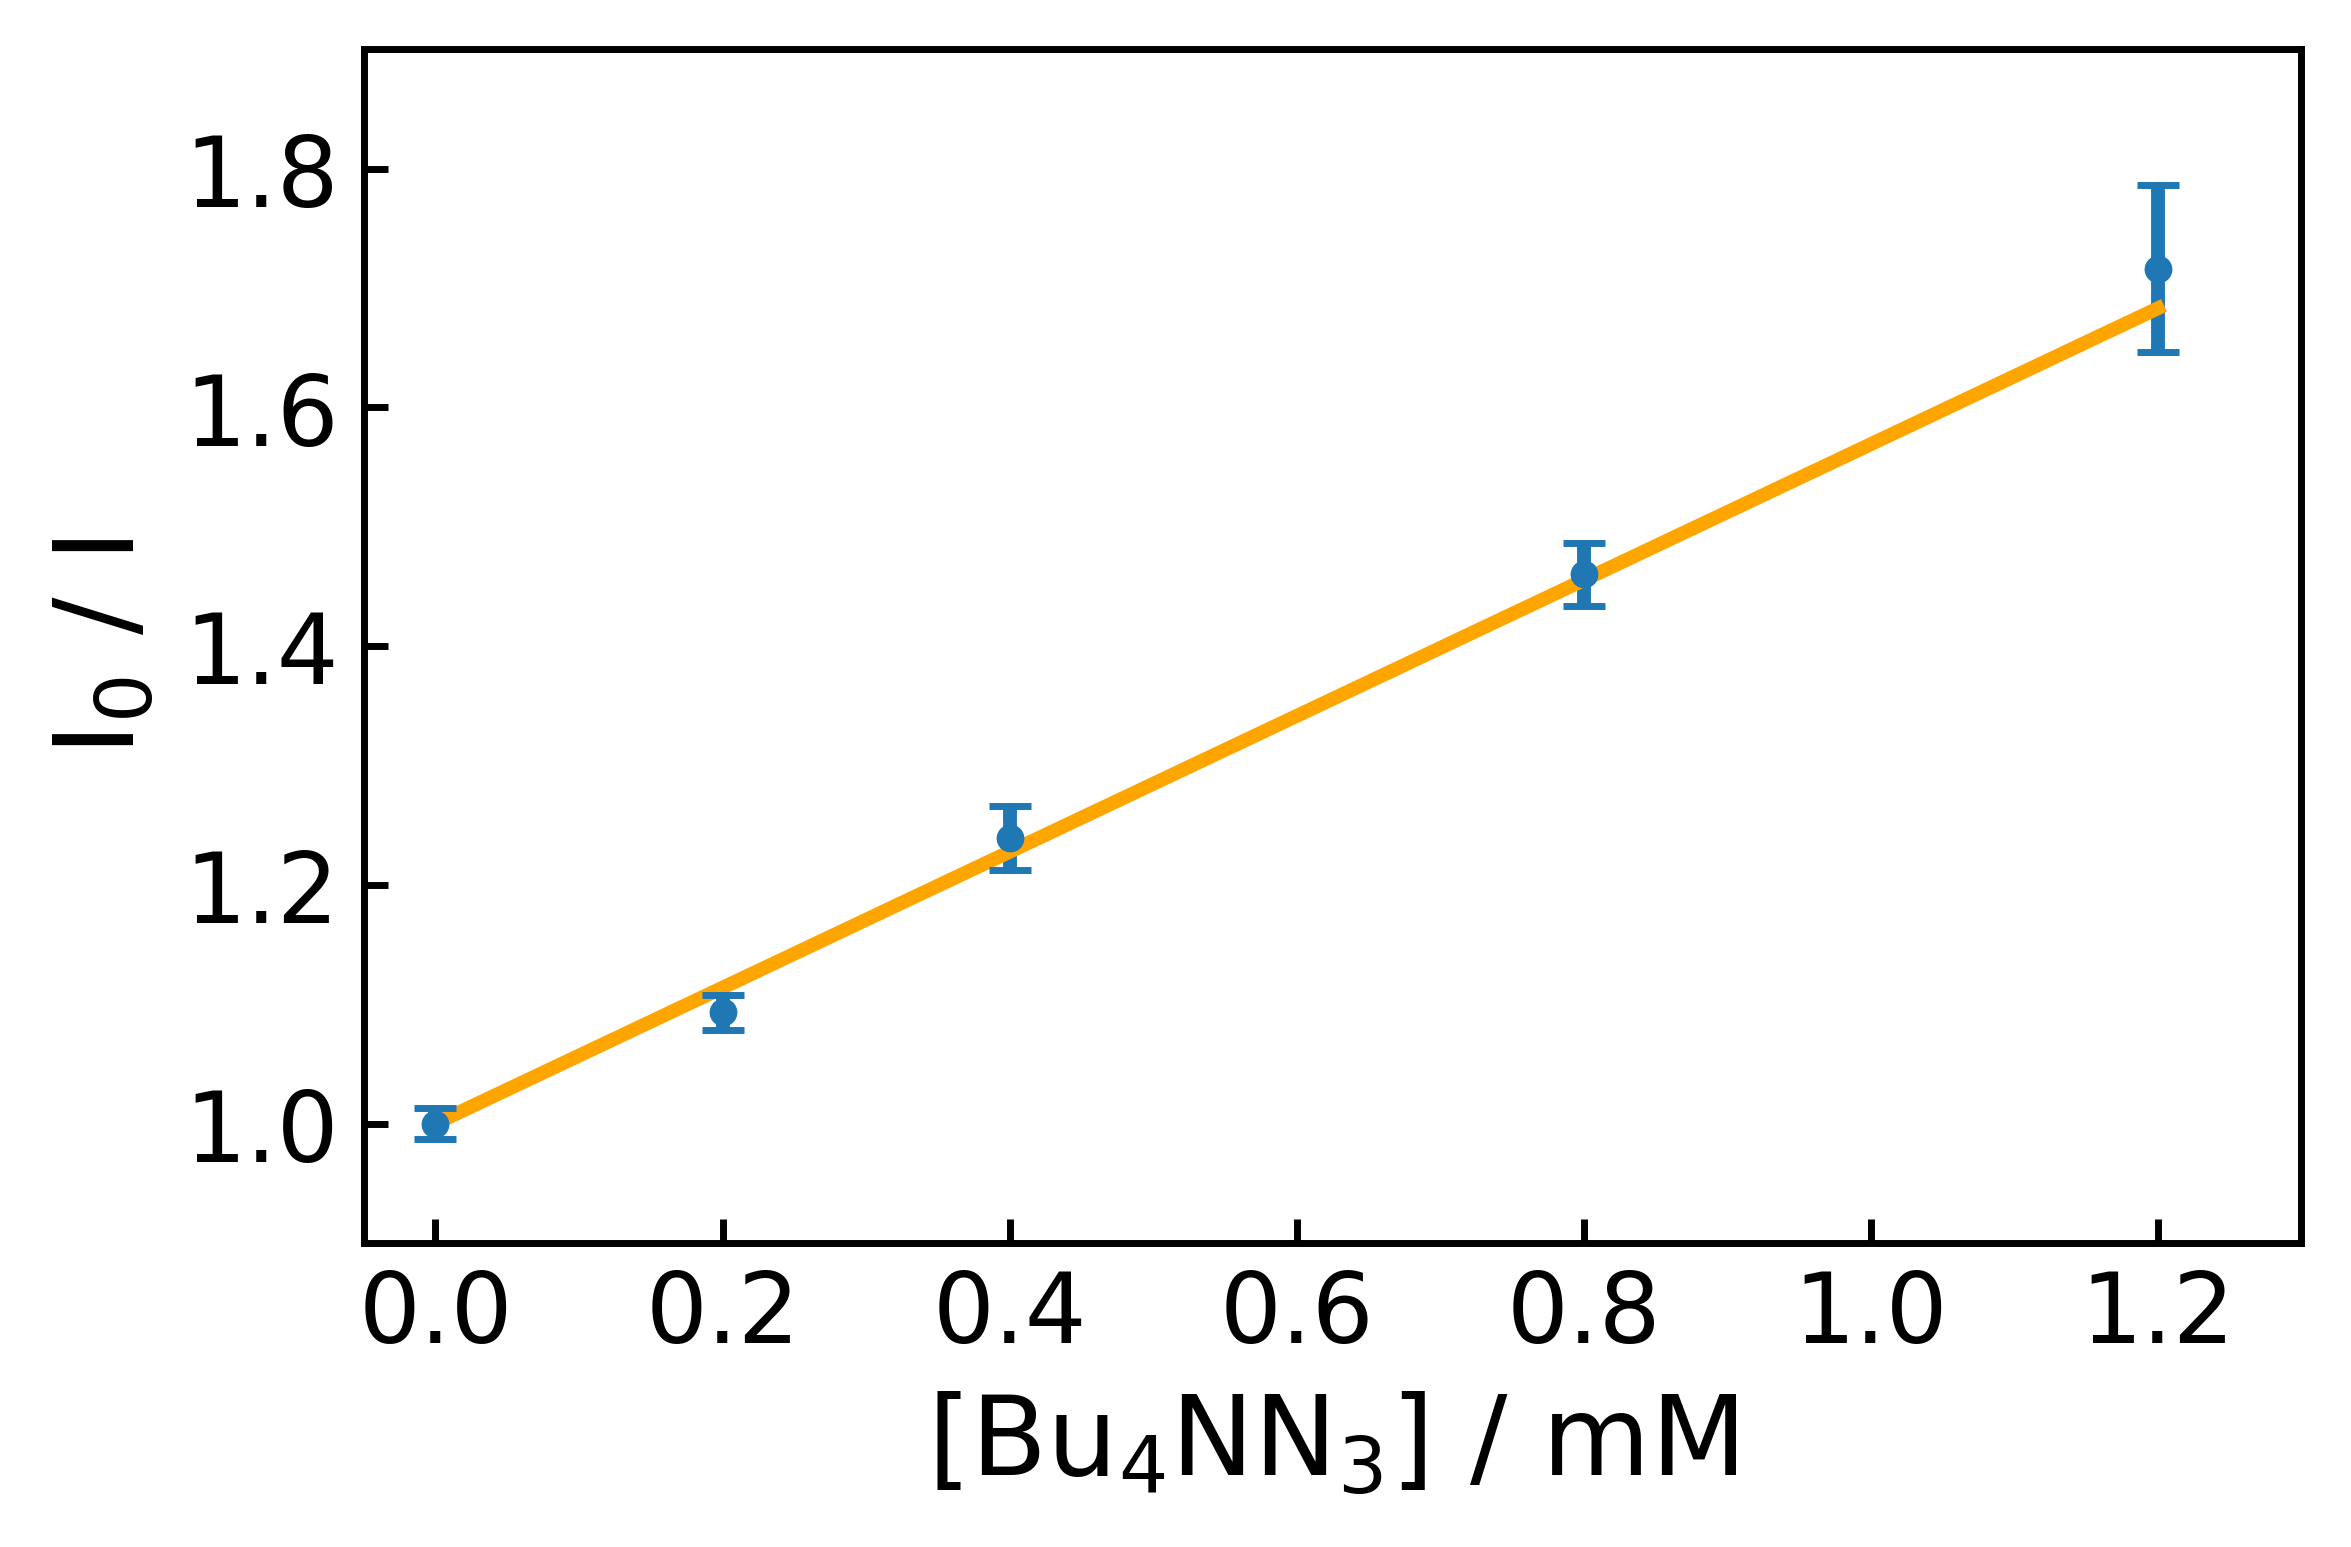

In [182]:
conc=[0,0.2,0.4,0.8,1.2]

#calculate integrated counts at each concentration
ar=integral_list[0:3]
a1=integral_list[3:6]
a2=integral_list[6:9]
a3=integral_list[9:12]
a4=integral_list[12:15]
a5=integral_list[15:18]

avg_counts=[np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5)]
n_avg_counts=np.divide(np.mean(a1),avg_counts)
sd_counts=[np.std(np.divide(np.mean(a1),a1)),np.std(np.divide(np.mean(a1),a2)),np.std(np.divide(np.mean(a1),a3)),np.std(np.divide(np.mean(a1),a4)),np.std(np.divide(np.mean(a1),a5))]
sd_error=np.divide(sd_counts,np.sqrt(3))

tau=18.7e-9

popt1,pcov1=curve_fit(func, conc, n_avg_counts,sigma=sd_counts)
print(popt1)

#R^2 value
residuals_1 = n_avg_counts-func(np.array(conc), popt1[0])
ss_res = np.sum(residuals_1**2)
ss_tot = np.sum((n_avg_counts-np.mean(n_avg_counts))**2)
r_squared_1 = round(1 - (ss_res / ss_tot),3)
perr1 = np.sqrt(np.diag(pcov1))

print('gradient= ',popt1[0],'error=',pcov1[0],'R^2= ',str(r_squared_1))

model_counts=[]
for i in conc:
    model_counts.append(func(i,popt1[0]))

with rc_context(fname=rc_fname):
    plt.plot(conc,model_counts,label='fitting',color='orange')
    plt.errorbar(conc, n_avg_counts, yerr=sd_error, xerr=None, fmt='.',mew=1,capsize=3)
    plt.xlabel('[Bu$_4$NN$_3$] / mM')
    plt.ylabel('I$_0$ / I')
    plt.xlim(-0.05,1.3)
    plt.ylim(0.9,1.9)

Stern-Volmer bimolecular quenching coefficient:
30.4 +- 1.0


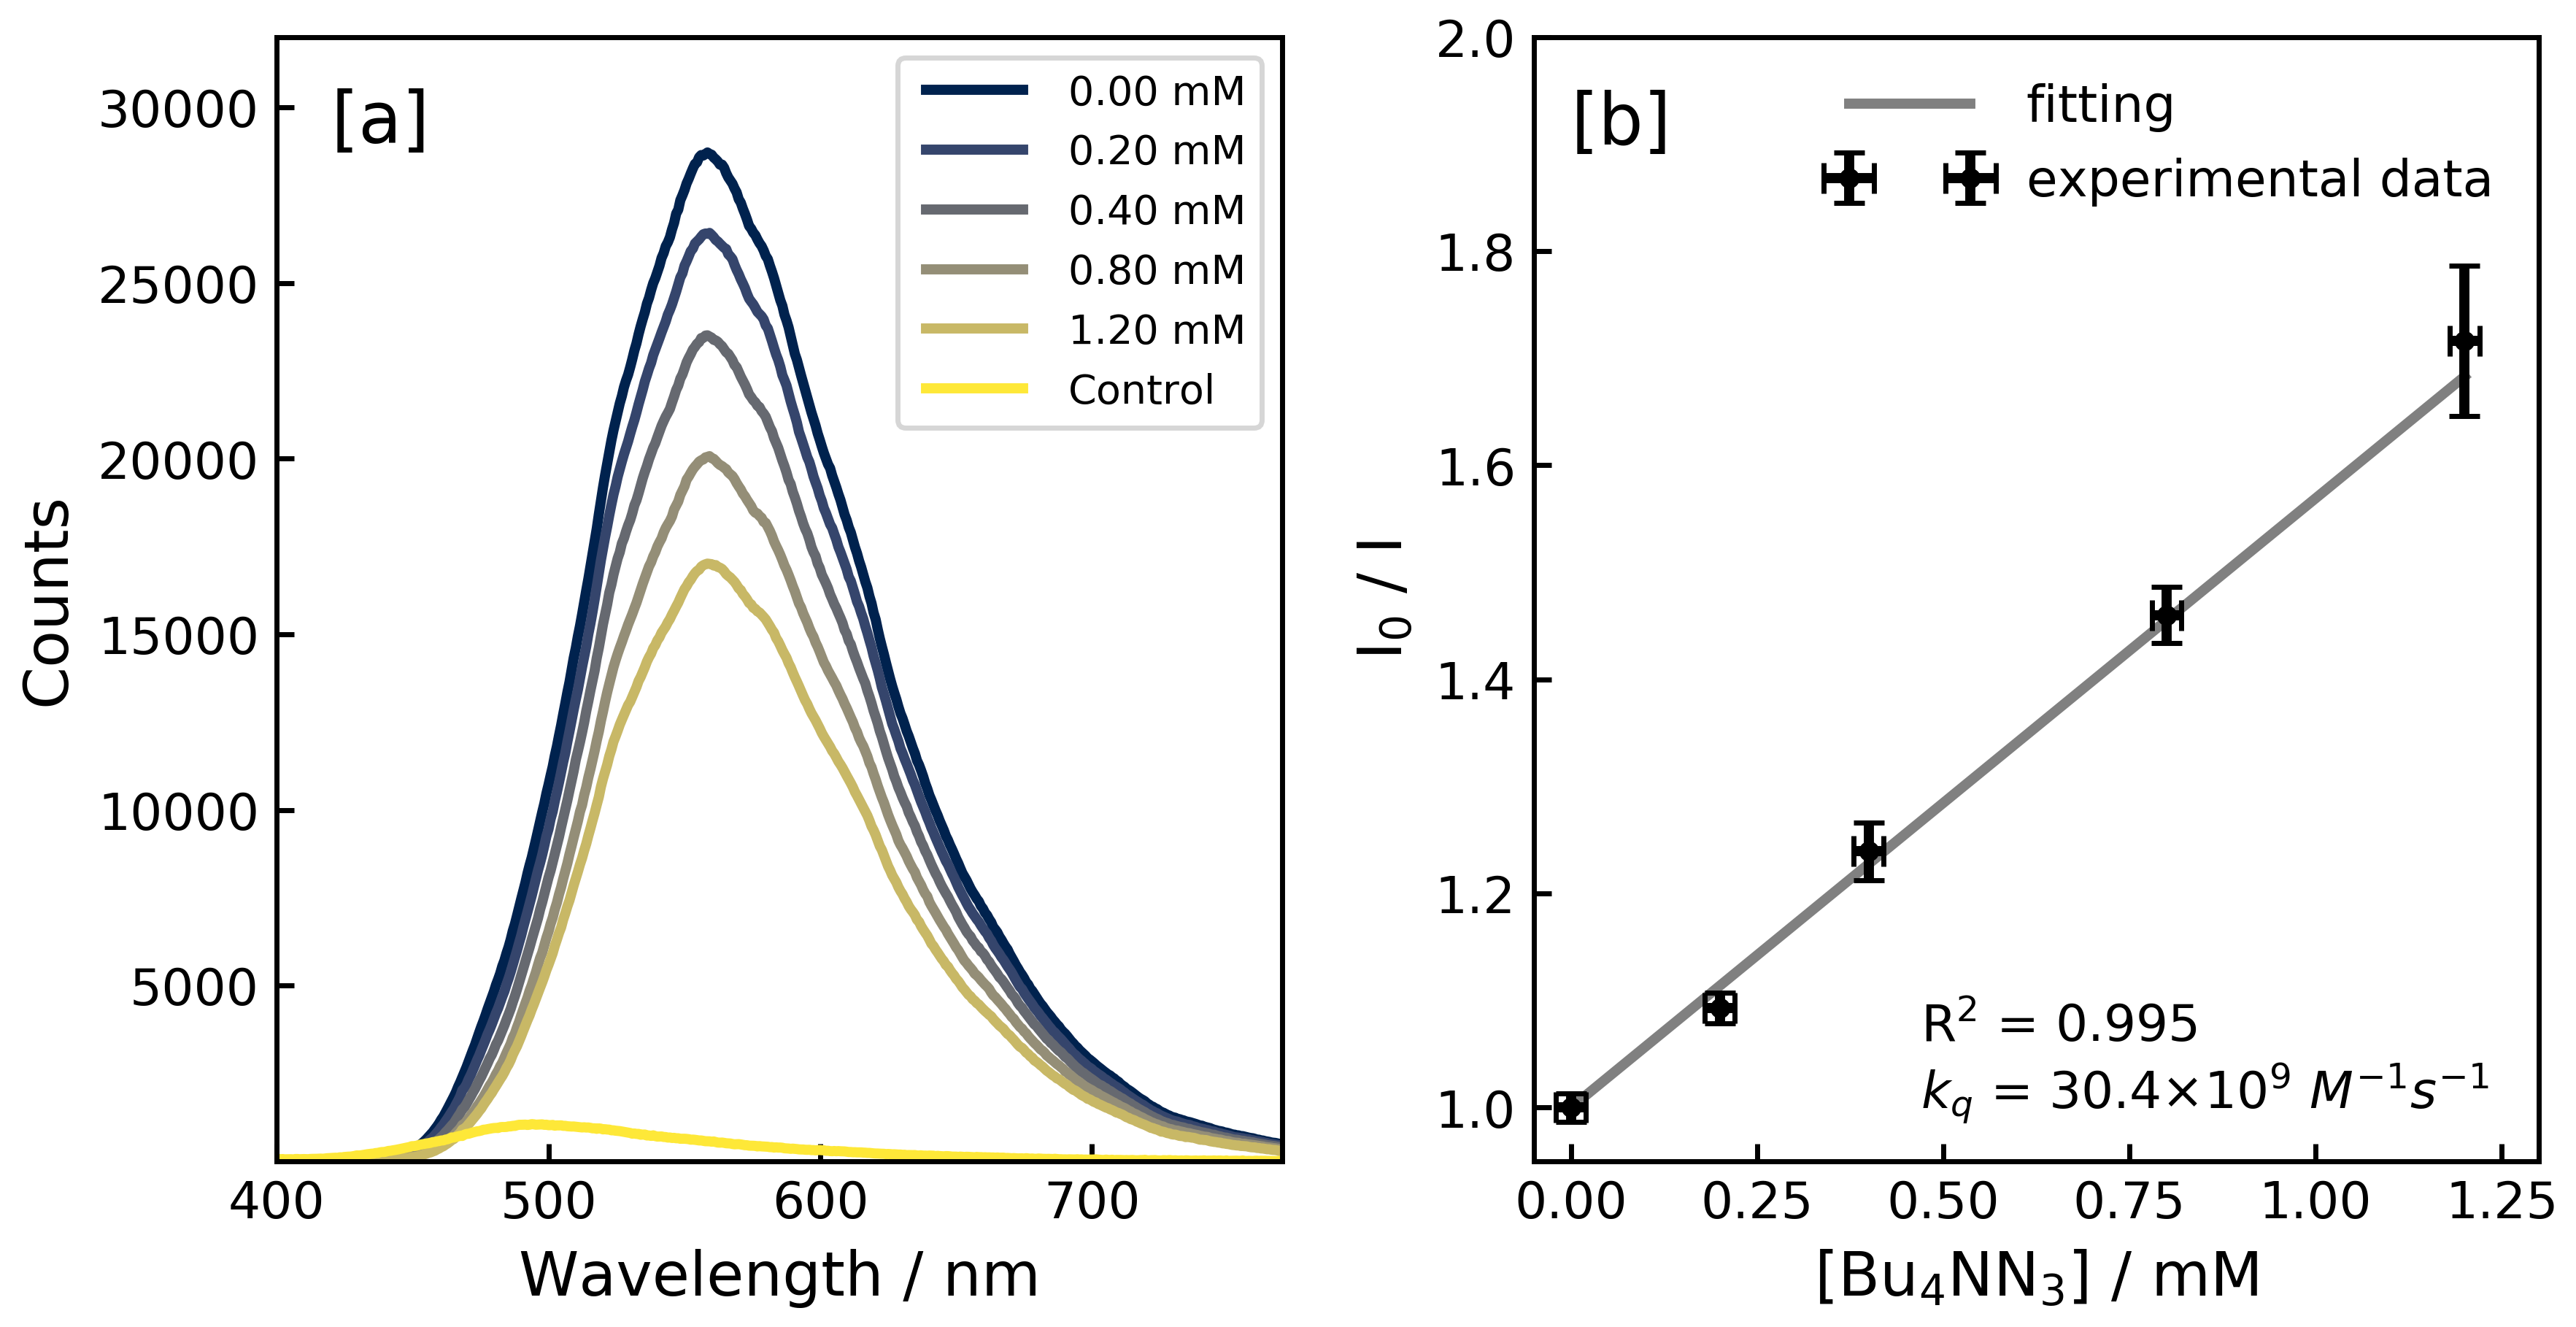

In [183]:
xerr_v=0.02

SV1=round((popt1[0]*1e-9)/(1e-3*tau),1)
SVerr=round((perr1[0]*1e-9)/(1e-3*tau),1)
print('Stern-Volmer bimolecular quenching coefficient:')
print(SV1,'+-',SVerr)

evenly_spaced_interval = np.linspace(0, 1, len(conc)+1)
colors = [cm.cividis(x) for x in evenly_spaced_interval]

with rc_context(fname=rc_fname):
    fig = plt.figure(figsize=(8, 4))
    gs = gridspec.GridSpec(1,2,width_ratios=(1,1),wspace=0.25)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)
    ax1 = plt.subplot(gs[0])
    ax1.plot(wav,c1,color=colors[0],label='{}'.format('0.00 mM'))
    ax1.plot(wav,c2,color=colors[1],label='{}'.format('0.20 mM'))
    ax1.plot(wav,c3,color=colors[2],label='{}'.format('0.40 mM'))
    ax1.plot(wav,c4,color=colors[3],label='{}'.format('0.80 mM'))
    ax1.plot(wav,c5,color=colors[4],label='{}'.format('1.20 mM'))
    ax1.plot(wav,cr,color=colors[5],label='{}'.format('Control'))
    ax1.legend(frameon=True,fontsize=8)
    ax1.set_xlabel('Wavelength / nm',fontsize=12)
    ax1.set_ylabel('Counts',fontsize=12)
    ax1.set_xlim(400,770)
    ax1.set_ylim(1,32000)
    ax1.text(420,29000,'[a]',fontsize=14)
    ax2 = plt.subplot(gs[1])
    ax2.errorbar(conc, n_avg_counts, yerr=sd_error, xerr=xerr_v, color='black',fmt='.',mew=1,capsize=3,label='{}'.format('experimental data'))
    ax2.plot(conc,model_counts,color='grey',zorder=1,label='{}'.format('fitting'))
    ax2.legend(loc='upper right',fontsize=10)
    ax2.set_xlabel('[Bu$_4$NN$_3$] / mM',fontsize=12)
    ax2.set_ylabel('I$_0$ / I',fontsize=12)
    ax2.text(0.47,1.0,'{}'.format('R$^2$ = '+str(r_squared_1)+'\n$k_q$ = '+str(SV1)+r'$\times 10^{9}$ $M^{-1}s^{-1}$'),fontsize=10)
    ax2.set_xlim(-0.05,1.3)
    ax2.set_ylim(0.95,2.0)
    ax2.text(0,1.9,'[b]',fontsize=14)
    plt.show()

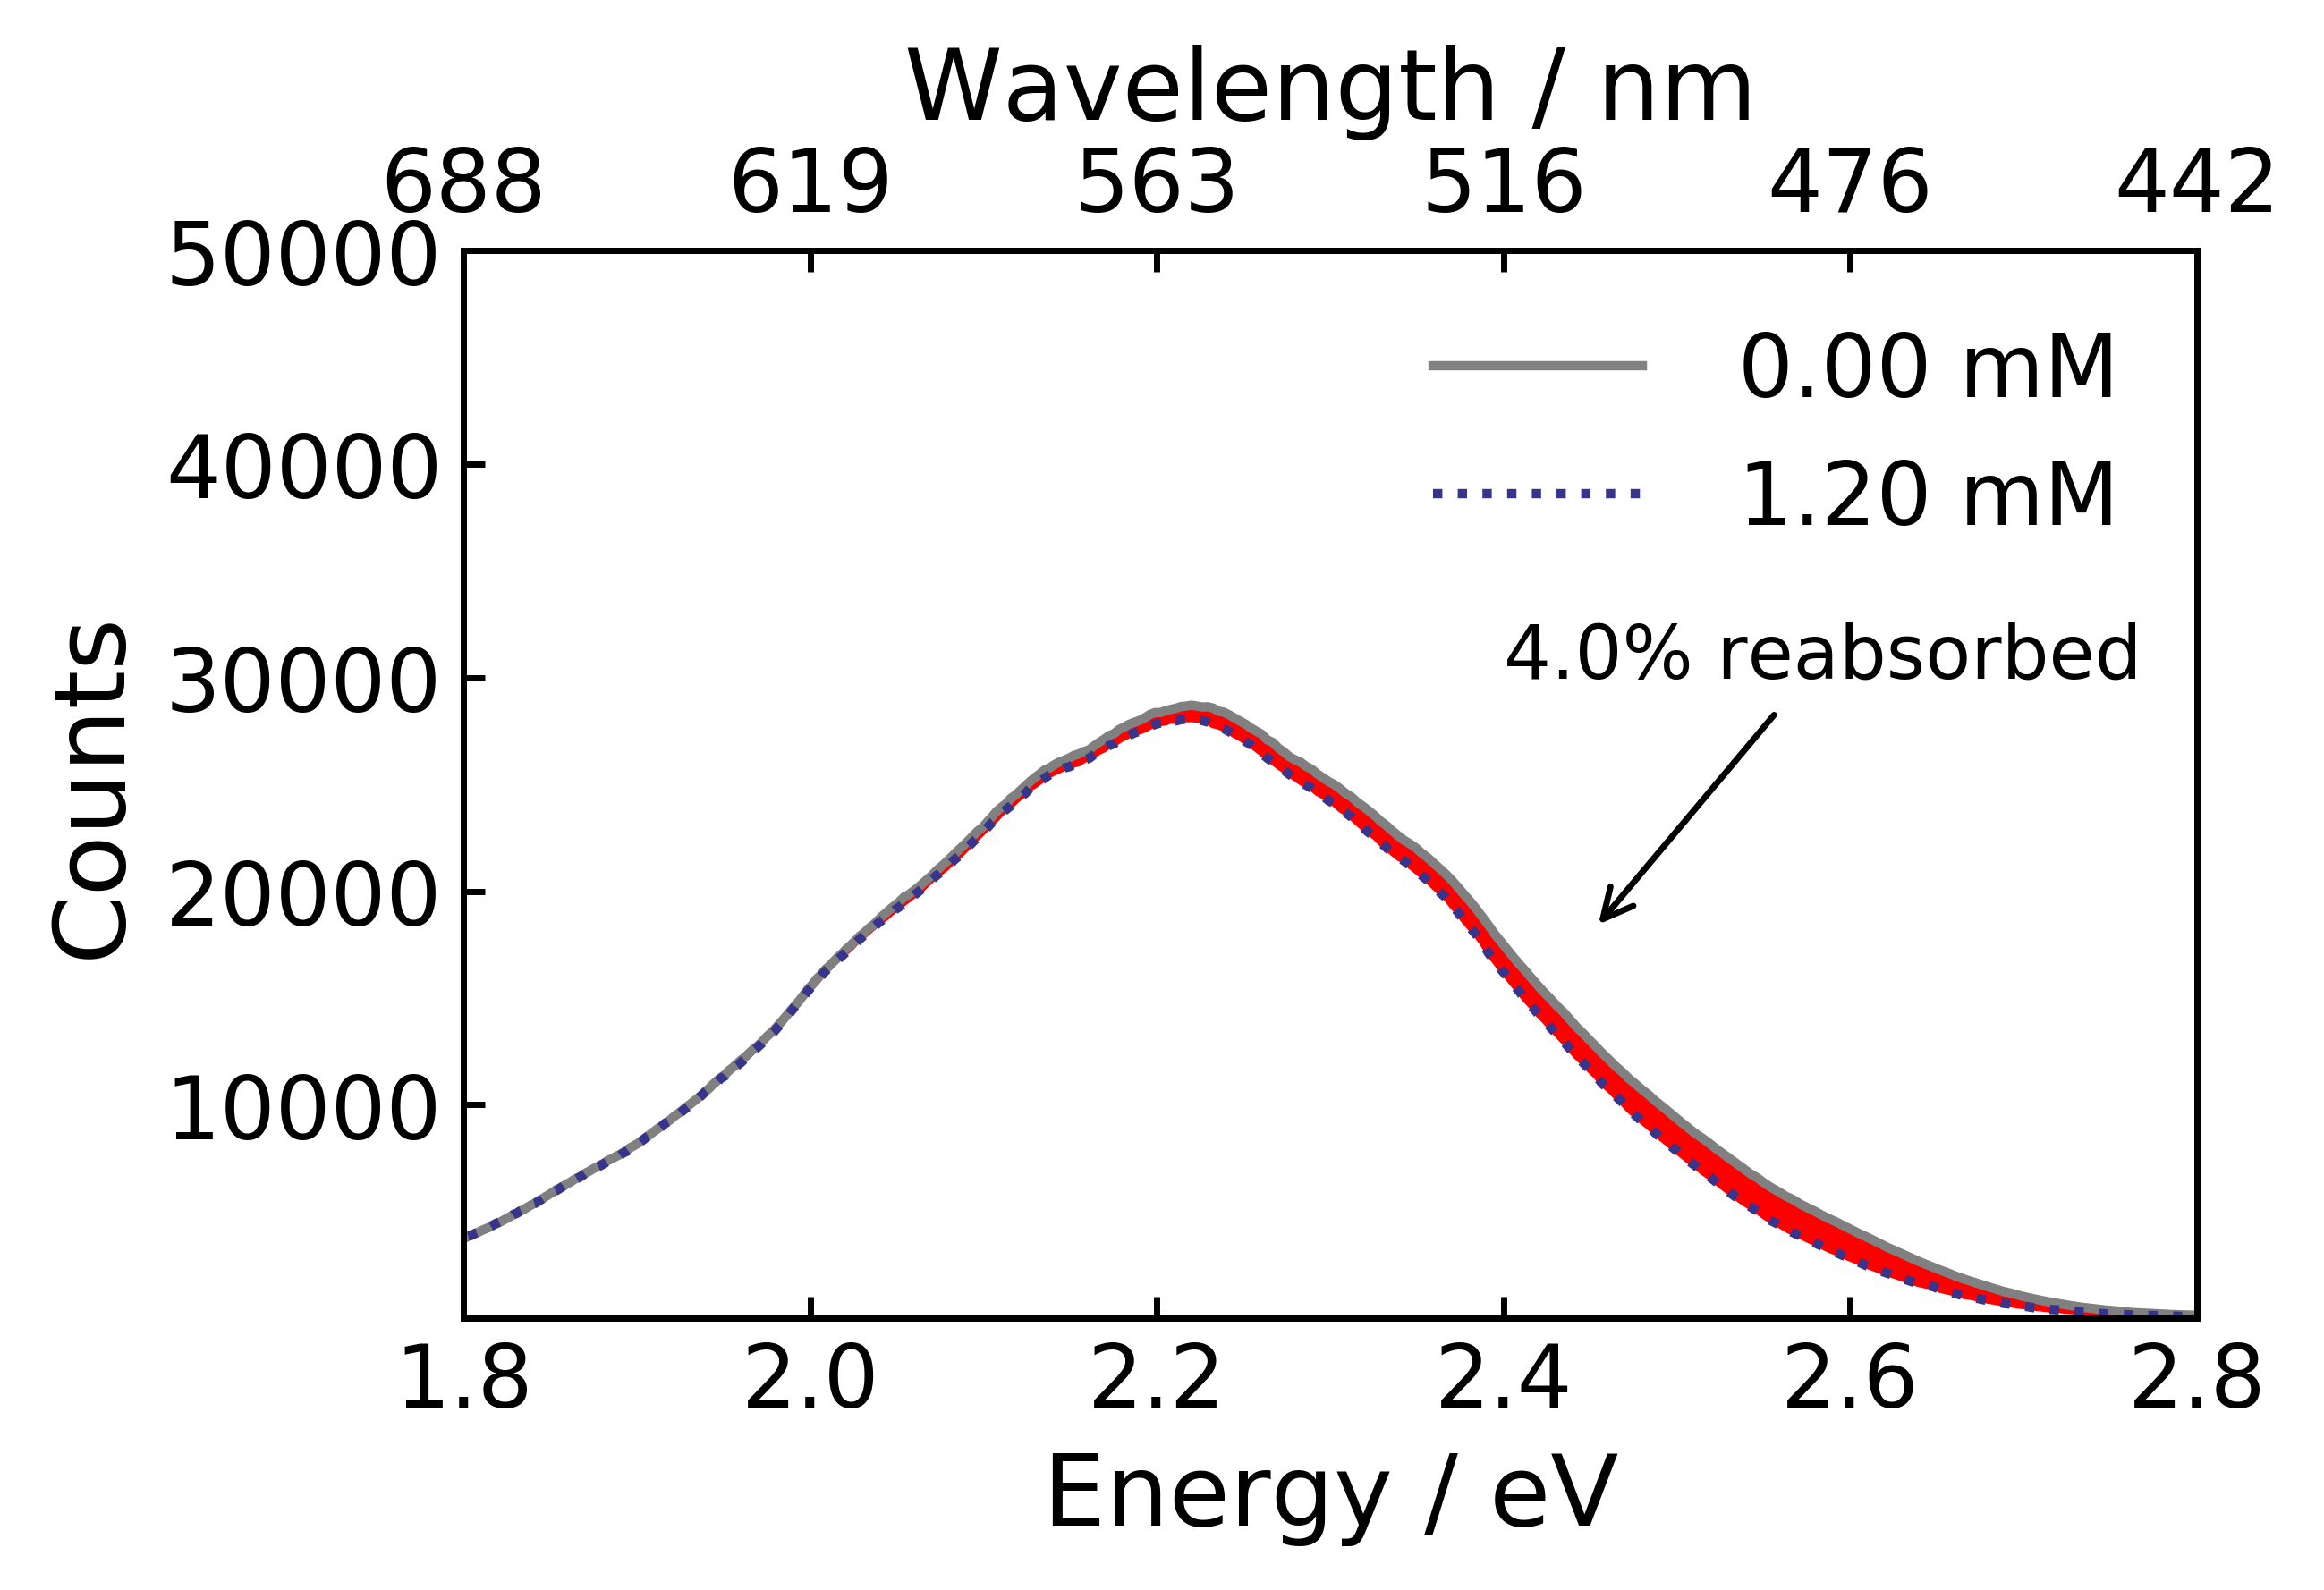

In [184]:
sf=1.65
with rc_context(fname=rc_fname):
    fig, ax1 = plt.subplots()
    ax1.plot(en,c1,color='grey',label='{}'.format('0.00 mM'),ls='-',lw=1.5)
    ax1.plot(en,c5*sf,color=OPT[1],label='{}'.format('1.20 mM'),ls=':',lw=1.5)
    ax1.fill_between(en,np.ravel(c1),np.ravel(c5*sf),color='red')
    ax1.legend()
    ax1.annotate('4.0% reabsorbed',xy=(2.45,18000),xytext=(2.4, 30000),arrowprops=dict(arrowstyle='->'),fontsize=12)
    ax1.set_xlim(1.8,2.8)
    #ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax1.set_ylim(10,50000)
    ax1.set_ylabel('Counts')
    ax1.set_xlabel('Energy / eV')
    ax2=ax1.twiny()
    ax2.set_xticklabels([int(np.divide(6.62607004e-34*299792458*1e9*(1/1.60217662e-19),x)) for x in ax1.get_xticks()])
    ax2.set_xlabel('Wavelength / nm')

# 4CzIPN CHA

In [185]:
# Load the datafile and create a Datafile instance
df2=of.Datafile(file_path2)

# List the datasets contained within the datafile
df2.list_groups()

Datafile intialised successfully 

Key 0: ACN-Clean-1 

Key 1: ACN-Clean-2 

Key 2: ACN-Clean-3 

Key 3: ACN-Clean-4 

Key 4: ACN-Clean-5 

Key 5: ACN-Clean-6 

Key 6: S1-1 

Key 7: S1-2 

Key 8: S1-3 

Key 9: S2-1 

Key 10: S2-2 

Key 11: S2-3 

Key 12: S3-1 

Key 13: S3-2 

Key 14: S3-3 

Key 15: S4-1 

Key 16: S4-2 

Key 17: S4-3 

Key 18: S5-1 

Key 19: S5-2 

Key 20: S5-3 



In [186]:
# Create list of all spectra at all quencher concentrations (3 repeats)
ds_list=[]

ds_list.append(of.Dataset(df2,3))
ds_list.append(of.Dataset(df2,4))
ds_list.append(of.Dataset(df2,5))
ds_list.append(of.Dataset(df2,6))
ds_list.append(of.Dataset(df2,7))
ds_list.append(of.Dataset(df2,8))
ds_list.append(of.Dataset(df2,9))
ds_list.append(of.Dataset(df2,10))
ds_list.append(of.Dataset(df2,11))
ds_list.append(of.Dataset(df2,12))
ds_list.append(of.Dataset(df2,13))
ds_list.append(of.Dataset(df2,14))
ds_list.append(of.Dataset(df2,15))
ds_list.append(of.Dataset(df2,16))
ds_list.append(of.Dataset(df2,17))
ds_list.append(of.Dataset(df2,18))
ds_list.append(of.Dataset(df2,19))
ds_list.append(of.Dataset(df2,20))

# Pre-process the data (background correction)
for item in ds_list:
    item.pre_process()

/ACN-Clean-4/timelapse_0 dataset loaded successfully 

/ACN-Clean-5/timelapse_0 dataset loaded successfully 

/ACN-Clean-6/timelapse_0 dataset loaded successfully 

/S1-1/timelapse_0 dataset loaded successfully 

/S1-2/timelapse_0 dataset loaded successfully 

/S1-3/timelapse_0 dataset loaded successfully 

/S2-1/timelapse_0 dataset loaded successfully 

/S2-2/timelapse_0 dataset loaded successfully 

/S2-3/timelapse_0 dataset loaded successfully 

/S3-1/timelapse_0 dataset loaded successfully 

/S3-2/timelapse_0 dataset loaded successfully 

/S3-3/timelapse_0 dataset loaded successfully 

/S4-1/timelapse_0 dataset loaded successfully 

/S4-2/timelapse_0 dataset loaded successfully 

/S4-3/timelapse_0 dataset loaded successfully 

/S5-1/timelapse_0 dataset loaded successfully 

/S5-2/timelapse_0 dataset loaded successfully 

/S5-3/timelapse_0 dataset loaded successfully 

Measurement was started at 2021-07-28 11:39:20.695656, 
 normalising times and applying a background correction 

M

In [187]:
integral_list=[]
plot_list=[]
plot_list_jac=[]

for item in ds_list:
    time_slice=of.time_counts(item,[7],plot=False)
    slice_wav=time_slice.truncate(before=399.8040992224527, after=770.3879359073867,axis='columns')
    slice_wav=slice_wav.sort_index(axis=1,ascending=False)
    wav=slice_wav.columns
    en=wav2en(slice_wav.columns) #in ev
    scalef=np.divide(6.62607004e-34*299792458*1e-12,np.square(np.multiply(en,1.60217662e-19)))
    plot_list.append(slice_wav.values[0])
    slice_wav_jac=pd.DataFrame(np.multiply(slice_wav.values[0],scalef),index=en)
    plot_list_jac.append(slice_wav_jac.values)
    integral=spi.trapz(y=np.transpose(slice_wav_jac.values),x=en)
    print(item.h5_loc,'\n',str(integral))
    integral_list.append(integral)

Will plot 6.0 s in dataset
/ACN-Clean-4/timelapse_0 
 [878.65454356]
Will plot 8.0 s in dataset
/ACN-Clean-5/timelapse_0 
 [980.59056587]
Will plot 6.0 s in dataset
/ACN-Clean-6/timelapse_0 
 [876.33298399]
Will plot 8.0 s in dataset
/S1-1/timelapse_0 
 [31682.60132267]
Will plot 8.0 s in dataset
/S1-2/timelapse_0 
 [29850.52559518]
Will plot 8.0 s in dataset
/S1-3/timelapse_0 
 [29254.10603143]
Will plot 6.0 s in dataset
/S2-1/timelapse_0 
 [28426.08043105]
Will plot 8.0 s in dataset
/S2-2/timelapse_0 
 [26567.71146449]
Will plot 8.0 s in dataset
/S2-3/timelapse_0 
 [26113.39980224]
Will plot 8.0 s in dataset
/S3-1/timelapse_0 
 [26722.181496]
Will plot 8.0 s in dataset
/S3-2/timelapse_0 
 [25792.39610647]
Will plot 6.0 s in dataset
/S3-3/timelapse_0 
 [24941.36477885]
Will plot 8.0 s in dataset
/S4-1/timelapse_0 
 [24341.18293422]
Will plot 6.0 s in dataset
/S4-2/timelapse_0 
 [24195.41080552]
Will plot 6.0 s in dataset
/S4-3/timelapse_0 
 [23600.63488179]
Will plot 8.0 s in dataset


In [188]:
# calculate average spectra at each concentration
cr=np.divide(sum(plot_list[0:3]),3)
c1=np.divide(sum(plot_list[3:6]),3)
c2=np.divide(sum(plot_list[6:9]),3)
c3=np.divide(sum(plot_list[9:12]),3)
c4=np.divide(sum(plot_list[12:15]),3)
c5=np.divide(sum(plot_list[15:18]),3)

[0.02919277]
gradient=  0.029192769055516585 error= 0.0022223241605668726 R^2=  0.847


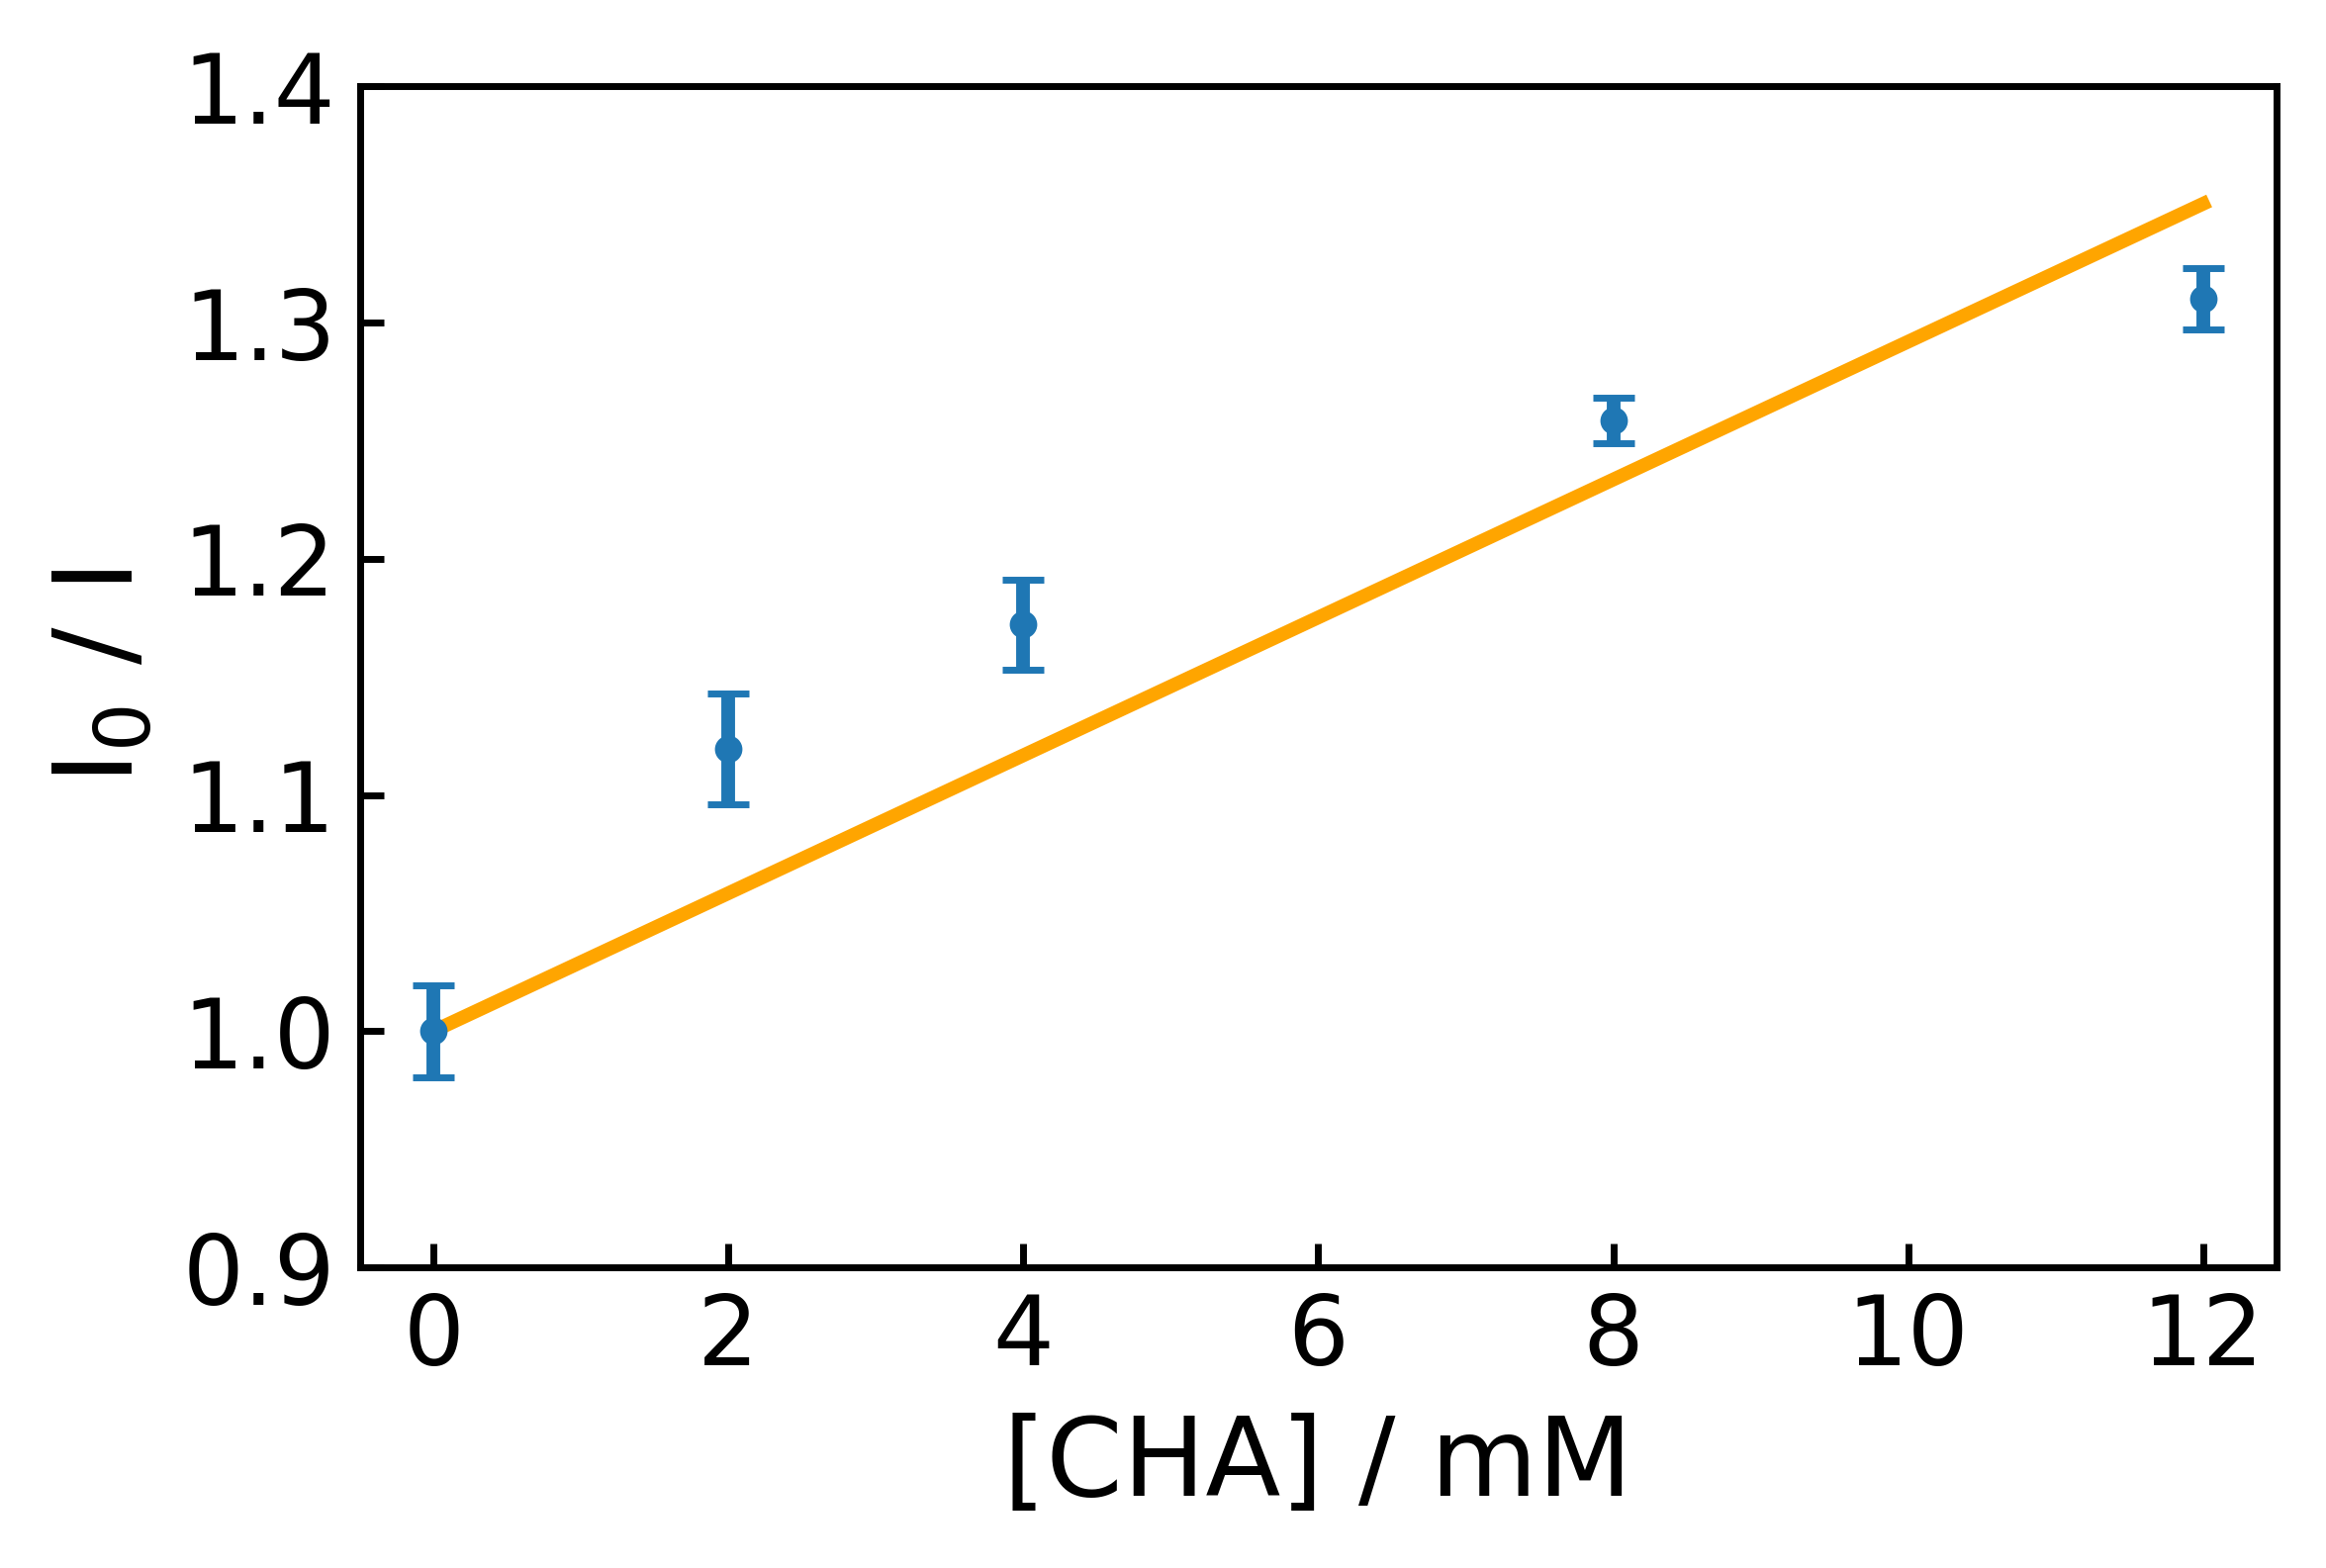

In [189]:
conc=[0.0,2.0,4.0,8.0,12.0]

#calculate integrated counts at each concentration
ar=integral_list[0:3]
a1=integral_list[3:6]
a2=integral_list[6:9]
a3=integral_list[9:12]
a4=integral_list[12:15]
a5=integral_list[15:18]

avg_counts=[np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5)]
n_avg_counts=np.divide(np.mean(a1),avg_counts)
sd_counts=[np.std(np.divide(np.mean(a1),a1)),np.std(np.divide(np.mean(a1),a2)),np.std(np.divide(np.mean(a1),a3)),np.std(np.divide(np.mean(a1),a4)),np.std(np.divide(np.mean(a1),a5))]
sd_error=np.divide(sd_counts,np.sqrt(3))

tau=18.7e-9

popt1,pcov1=curve_fit(func, conc, n_avg_counts,sigma=sd_counts)
print(popt1)

#R^2 value
residuals_1 = n_avg_counts-func(np.array(conc), popt1[0])
ss_res = np.sum(residuals_1**2)
ss_tot = np.sum((n_avg_counts-np.mean(n_avg_counts))**2)
r_squared_1 = round(1 - (ss_res / ss_tot),3)
perr1 = np.sqrt(np.diag(pcov1))
print('gradient= ',popt1[0],'error=',perr1[0],'R^2= ',str(r_squared_1))

model_counts=[]
for i in conc:
    model_counts.append(func(i,popt1[0]))

with rc_context(fname=rc_fname):
    plt.plot(conc,model_counts,label='fitting',color='orange')
    plt.errorbar(conc, n_avg_counts, yerr=sd_error, xerr=None, fmt='.',mew=1,capsize=3)
    plt.xlabel('[CHA] / mM')
    plt.ylabel('I$_0$ / I')
    plt.xlim(-0.5,12.5)
    plt.ylim(0.9,1.4)

Stern-Volmer bimolecular quenching coefficient:
1.6 +- 0.1


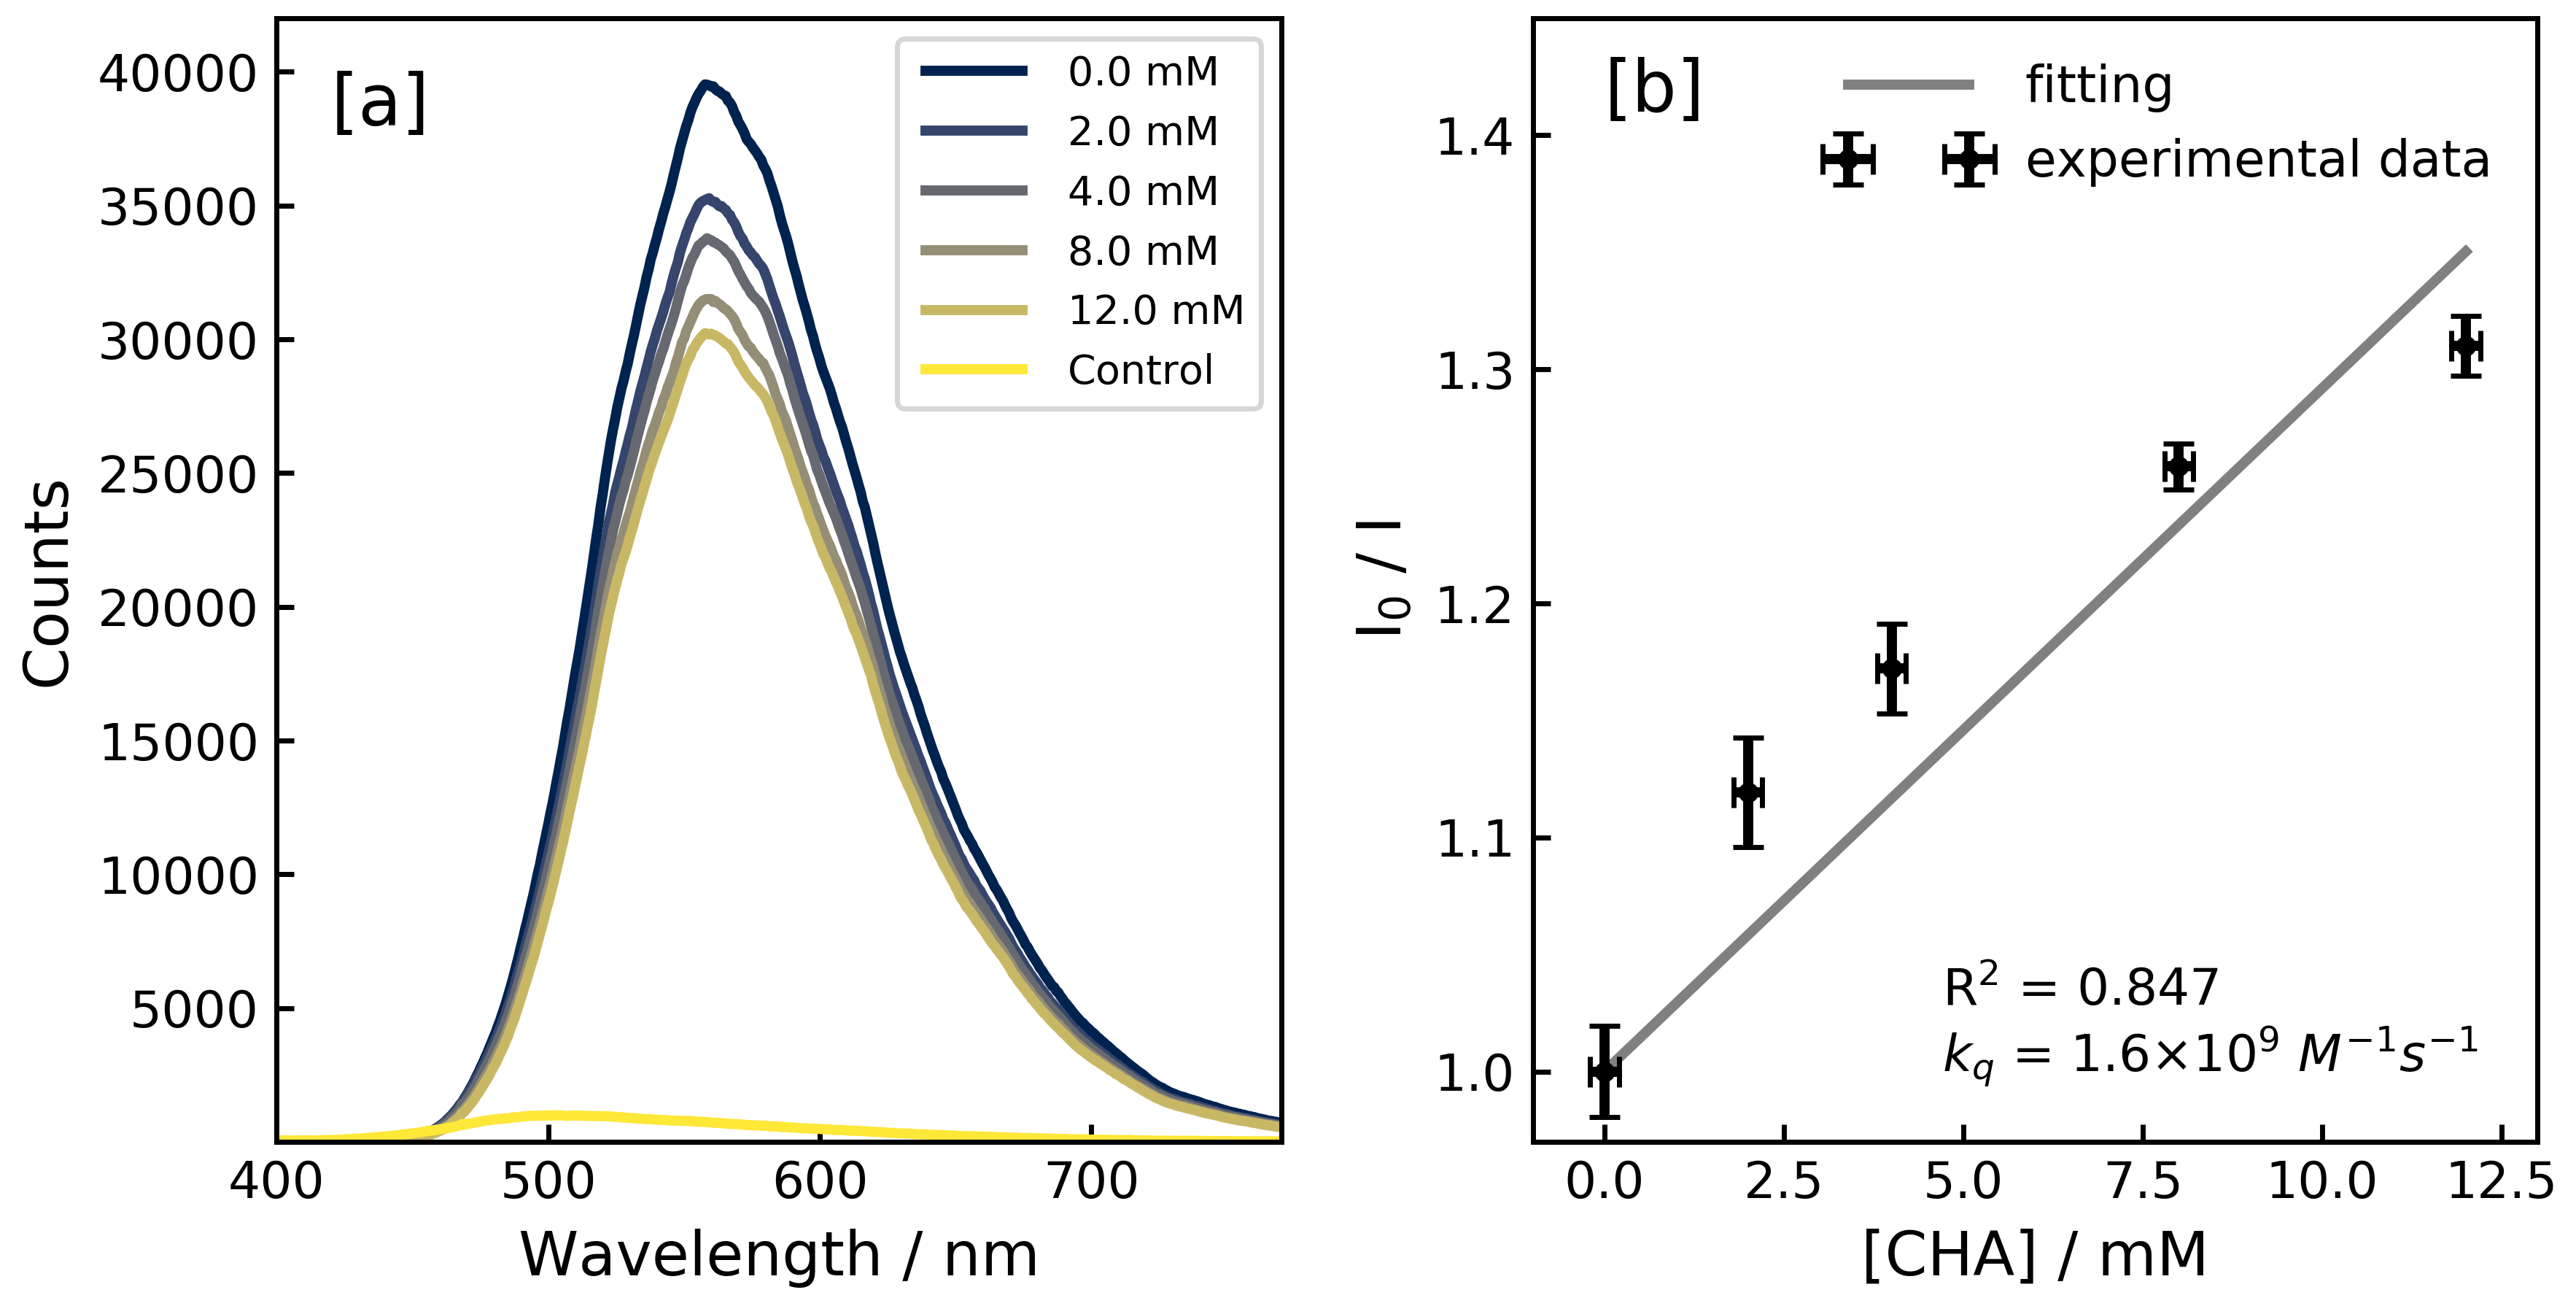

In [190]:
xerr_v=0.2

SV1=round((popt1[0]*1e-9)/(1e-3*tau),1)
SVerr=round((perr1[0]*1e-9)/(1e-3*tau),1)
print('Stern-Volmer bimolecular quenching coefficient:')
print(SV1,'+-',SVerr)

evenly_spaced_interval = np.linspace(0, 1, len(conc)+1)
colors = [cm.cividis(x) for x in evenly_spaced_interval]

with rc_context(fname=rc_fname):
    fig = plt.figure(figsize=(8, 4))
    gs = gridspec.GridSpec(1,2,width_ratios=(1,1),wspace=0.25)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)
    ax1 = plt.subplot(gs[0])
    ax1.plot(wav,c1,color=colors[0],label='{}'.format('0.0 mM'))
    ax1.plot(wav,c2,color=colors[1],label='{}'.format('2.0 mM'))
    ax1.plot(wav,c3,color=colors[2],label='{}'.format('4.0 mM'))
    ax1.plot(wav,c4,color=colors[3],label='{}'.format('8.0 mM'))
    ax1.plot(wav,c5,color=colors[4],label='{}'.format('12.0 mM'))
    ax1.plot(wav,cr,color=colors[5],label='{}'.format('Control'))
    ax1.legend(frameon=True,fontsize=8)
    ax1.set_xlabel('Wavelength / nm',fontsize=12)
    ax1.set_ylabel('Counts',fontsize=12)
    ax1.set_xlim(400,770)
    ax1.set_ylim(1,42000)
    ax1.text(420,38000,'[a]',fontsize=14)
    ax2 = plt.subplot(gs[1])
    ax2.errorbar(conc, n_avg_counts, yerr=sd_error, xerr=xerr_v, color='black',fmt='.',mew=1,capsize=3,label='{}'.format('experimental data'))
    ax2.plot(conc,model_counts,color='grey',zorder=1,label='{}'.format('fitting'))
    ax2.legend(loc='upper right',fontsize=10)
    ax2.set_xlabel('[CHA] / mM',fontsize=12)
    ax2.set_ylabel('I$_0$ / I',fontsize=12)
    ax2.text(4.7,1.0,'{}'.format('R$^2$ = '+str(r_squared_1)+'\n$k_q$ = '+str(SV1)+r'$\times 10^{9}$ $M^{-1}s^{-1}$'),fontsize=10)
    ax2.set_xlim(-1,13)
    ax2.set_ylim(0.97,1.45)
    ax2.text(0,1.41,'[b]',fontsize=14)
    plt.show()